In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import linear, data_fit

In [21]:
data = pd.DataFrame({
    'pulse':[0, 5000, 10000, 20000, 25000], 
    'x': [0, 0.016, 0.031, 0.063, 0.078], 
    'x_err': [1e-9, 0.001, 0.001, 0.001, 0.001]
})

In [22]:
params_i = [1, 0]
params, params_err, chisq, dof = data_fit(
    params_i, linear, 
    data['pulse'], data['x'], data['x_err']
)

linspace = np.linspace(data['pulse'].min(), data['pulse'].max(), num=1000)
curve = linear(params, linspace)


Converged with chi-squared 0.43
Number of degrees of freedom, dof = 3.00
Reduced chi-squared 0.14

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 1.000e+00                | 3.130e-06                | 2.949e-08               
1           | 0.000e+00                | 1.739e-16                | 1.000e-09               


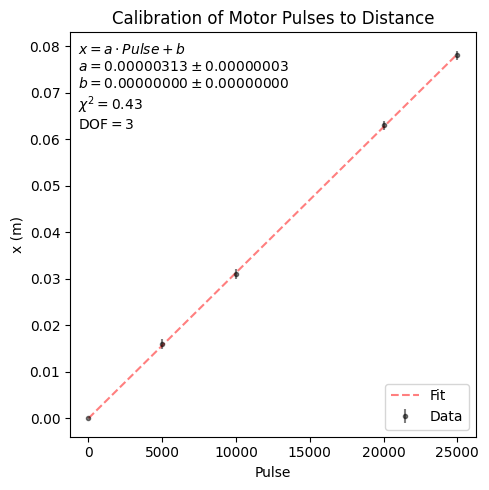

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.errorbar(
    data['pulse'], 
    data['x'], 
    data['x_err'], 
    fmt='k.', alpha=0.5,
    label='Data'
)

ax.plot(linspace, curve, color='r', linestyle='dashed', alpha=0.5, label='Fit')
ax.set_title('Calibration of Motor Pulses to Distance')
ax.set_xlabel('Pulse')
ax.set_ylabel('x (m)')

txt = '$x = a \cdot Pulse +b$\n'
txt += f'$a = {params[0]:.8f} \\pm {params_err[0]:.8f}$ \n'
txt += f'$b = {params[1]:.8f} \\pm {params_err[1]:.8f}$ \n'
txt += f'$\\chi^2 = {chisq:.2f}$ \n'
txt += f'DOF$ = {dof}$'
ax.text(0.02, 0.975, txt, transform=ax.transAxes , fontsize=10, va='top')

ax.legend(loc='lower right')

plt.tight_layout()

In [30]:
fig.savefig('./figures/calibration.pdf')

In [24]:
params[0], params[0]

(3.1304347826086867e-06, 3.1304347826086867e-06)